In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
from tkinter import *
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# Exploring the data, identifying dependent and independent variables
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# find more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Checking null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Overal Statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Overal Statistics
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [8]:
# Cleaning up data by dropping columns that are not of use
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Recoding Catergorical data: Geography and Gender
print('Encoding the following into a binary vector :', df['Geography'].unique())

Encoding the following into a binary vector : ['France' 'Spain' 'Germany']


In [11]:
# Encoding categorical variables into numerical values
df = pd.get_dummies(df, drop_first=True)
df = df.astype(int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [12]:
# Checking the distribution of Exited and not Exited customers
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

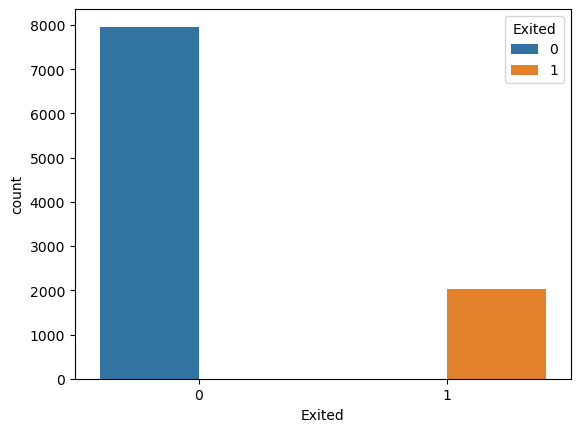

In [13]:
# Visualizing the distribution of Exited and not Exited customers
sns.countplot(x='Exited', data=df, hue='Exited')
plt.show()

In [14]:
# Setting the dependent and independent variables for the model
X = df.drop('Exited', axis=1)
Y = df['Exited']

In [15]:
# Balancing data using SMOTE
X_res, Y_res = SMOTE().fit_resample(X, Y)
print('Data is now equally distributed:', Y_res.value_counts())

Data is now equally distributed: Exited
1    7963
0    7963
Name: count, dtype: int64


In [16]:
# Splitting the Data into Training and Test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.20, random_state=42)

In [17]:
# Feauture Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
 # Logisistic Regression

log = LogisticRegression()
log.fit(X_train,Y_train)
Y_predict1 = log.predict(X_test)

In [19]:
print('Accuracy Score :', accuracy_score(Y_test, Y_predict1))
print('Precision Score :', precision_score(Y_test, Y_predict1))
print('Recall Score :', recall_score(Y_test, Y_predict1))
print('F1 score :', f1_score(Y_test, Y_predict1))

Accuracy Score : 0.7871939736346516
Precision Score : 0.775330396475771
Recall Score : 0.7933032839665164
F1 score : 0.784213876511776


In [20]:
# Support Vector Machine (SVM) model
svm_model = svm.SVC()
svm_model.fit(X_train, Y_train)
Y_predict2 = svm_model.predict(X_test)

In [21]:
print('Accuracy Score :', accuracy_score(Y_test, Y_predict2))
print('Precision Score :', precision_score(Y_test, Y_predict2))
print('Recall Score :', recall_score(Y_test, Y_predict2))
print('F1 score :', f1_score(Y_test, Y_predict2))

Accuracy Score : 0.8405524168236033
Precision Score : 0.8342930262316058
Recall Score : 0.8396651641983258
F1 score : 0.8369704749679076


In [22]:
# K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_predict3 = knn.predict(X_test)

In [23]:
print('Accuracy Score :', accuracy_score(Y_test, Y_predict3))
print('Precision Score :', precision_score(Y_test, Y_predict3))
print('Recall Score :', recall_score(Y_test, Y_predict3))
print('F1 score :', f1_score(Y_test, Y_predict3))

Accuracy Score : 0.822661644695543
Precision Score : 0.8034398034398035
Recall Score : 0.8422408242112042
F1 score : 0.8223828984596039


In [24]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
Y_predict4 = DTC.predict(X_test)

In [25]:
print('Accuracy Score :', accuracy_score(Y_test, Y_predict4))
print('Precision Score :', precision_score(Y_test, Y_predict4))
print('Recall Score :', recall_score(Y_test, Y_predict4))
print('F1 score :', f1_score(Y_test, Y_predict4))

Accuracy Score : 0.7944130571249215
Precision Score : 0.7737804878048781
Recall Score : 0.8171281390856407
F1 score : 0.7948637644848106


In [26]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)
Y_predict5 = RFC.predict(X_test)

In [27]:
print('Accuracy Score :', accuracy_score(Y_test, Y_predict5))
print('Precision Score :', precision_score(Y_test, Y_predict5))
print('Recall Score :', recall_score(Y_test, Y_predict5))
print('F1 score :', f1_score(Y_test, Y_predict5))

Accuracy Score : 0.8615819209039548
Precision Score : 0.8536895674300254
Recall Score : 0.8641339343206696
F1 score : 0.85888


In [28]:
GBC = GradientBoostingClassifier()
# Train Data
GBC.fit(X_train, Y_train)
Y_predict6 = GBC.predict(X_test)

In [29]:
print('Accuracy Score :', accuracy_score(Y_test, Y_predict6))
print('Precision Score :', precision_score(Y_test, Y_predict6))
print('Recall Score :', recall_score(Y_test, Y_predict6))
print('F1 score :', f1_score(Y_test, Y_predict6))

Accuracy Score : 0.8440050219711237
Precision Score : 0.8402061855670103
Recall Score : 0.8396651641983258
F1 score : 0.8399355877616747


In [30]:
# best model
final_dataACC = pd.DataFrame({'Models':['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'], 'ACC':[accuracy_score(Y_test,Y_predict1), accuracy_score(Y_test,Y_predict2),accuracy_score(Y_test,Y_predict3),accuracy_score(Y_test,Y_predict4),accuracy_score(Y_test,Y_predict5),accuracy_score(Y_test,Y_predict6)]})
print(final_dataACC)

  Models       ACC
0     LR  0.787194
1    SVC  0.840552
2    KNN  0.822662
3     DT  0.794413
4     RF  0.861582
5    GBC  0.844005


<Axes: xlabel='Models', ylabel='ACC'>

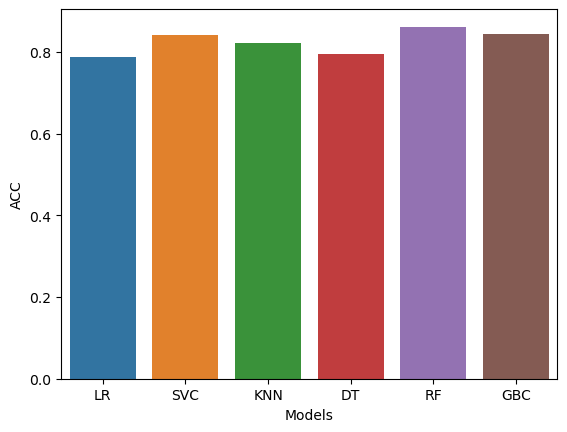

In [31]:

# Visualize Accuracy Scores
sns.barplot(x=final_dataACC['Models'], y=final_dataACC['ACC'])

In [32]:
final_dataPRS = pd.DataFrame({'Models':['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'], 'PRS':[precision_score(Y_test,Y_predict1), precision_score(Y_test,Y_predict2),precision_score(Y_test,Y_predict3),precision_score(Y_test,Y_predict4),precision_score(Y_test,Y_predict5),precision_score(Y_test,Y_predict6)]})
print(final_dataPRS)

  Models       PRS
0     LR  0.775330
1    SVC  0.834293
2    KNN  0.803440
3     DT  0.773780
4     RF  0.853690
5    GBC  0.840206


  Models       PRS
0     LR  0.775330
1    SVC  0.834293
2    KNN  0.803440
3     DT  0.773780
4     RF  0.853690
5    GBC  0.840206


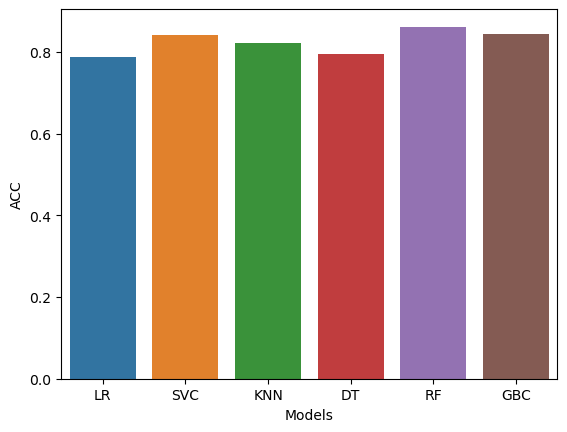

In [33]:
# Visualize Accuracy Scores
sns.barplot(x=final_dataACC['Models'], y=final_dataACC['ACC'])

final_dataPRS = pd.DataFrame({'Models':['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'], 'PRS':[precision_score(Y_test,Y_predict1), precision_score(Y_test,Y_predict2),precision_score(Y_test,Y_predict3),precision_score(Y_test,Y_predict4),precision_score(Y_test,Y_predict5),precision_score(Y_test,Y_predict6)]})
print(final_dataPRS)

  Models       REC
0     LR  0.793303
1    SVC  0.839665
2    KNN  0.842241
3     DT  0.817128
4     RF  0.864134
5    GBC  0.839665


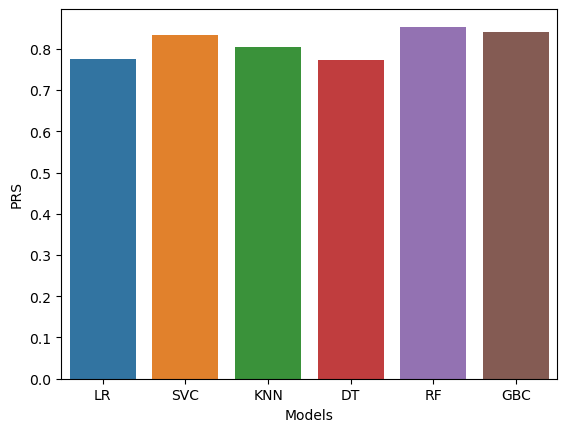

In [34]:
# Visualize Precision Scores
sns.barplot(x=final_dataPRS['Models'], y=final_dataPRS['PRS'])

final_dataREC = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
    'REC': [
        recall_score(Y_test, Y_predict1),
        recall_score(Y_test, Y_predict2),
        recall_score(Y_test, Y_predict3),
        recall_score(Y_test, Y_predict4),
        recall_score(Y_test, Y_predict5),
        recall_score(Y_test, Y_predict6)
    ]
})

print(final_dataREC)


  Models        F1
0     LR  0.784214
1    SVC  0.836970
2    KNN  0.822383
3     DT  0.794864
4     RF  0.858880
5    GBC  0.839936


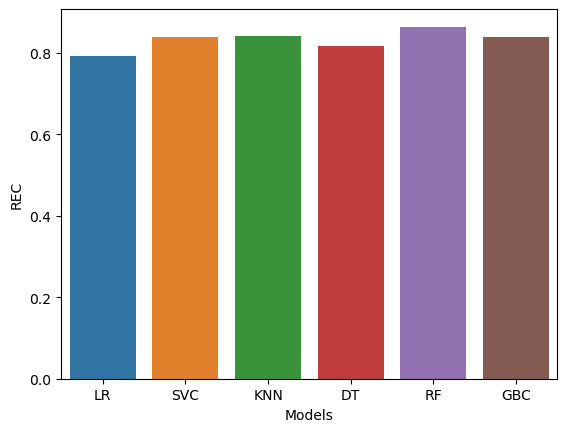

In [35]:

# Visualize Recall Scores
sns.barplot(x=final_dataREC['Models'], y=final_dataREC['REC'])

final_dataF1 = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
    'F1': [
        f1_score(Y_test, Y_predict1),
        f1_score(Y_test, Y_predict2),
        f1_score(Y_test, Y_predict3),
        f1_score(Y_test, Y_predict4),
        f1_score(Y_test, Y_predict5),
        f1_score(Y_test, Y_predict6)
    ]
})

print(final_dataF1)

In [36]:
# Saving the model
X_res=sc.fit_transform(X_res)

In [37]:
RFC.fit(X_res,Y_res)

RandomForestClassifier()

In [38]:
import joblib

In [39]:
joblib.dump(RFC, 'churn_predict_model')

['churn_predict_model']